# **Car_Data Scraping Alogorithm & Visualization**

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import pandas
import pandas as pd

# Step 3: Define the file path
df = pd.read_csv('Enter Your Drive Path')

# Step 5: Display the first 5 rows
print(df.head())


Mounted at /content/drive
                                      Name  Rating  Review Count  $ Price  \
0      2022 Mercedes-Benz GLS 450 4MATIC       4.8           852    51490   
1      2022 Mercedes-Benz E-Class 4MATIC       4.5           454    47479   
2      2023 Mercedes-Benz E-Class 4MATIC       4.8          5063    57000   
3       2023 Mercedes-Benz E-Class E 350       4.5          1950    43655   
4      2022 Mercedes-Benz S-Class 4MATIC       4.4          1433    71998   

                          Dealer Name  Mileage          Location  
0  Mercedes-Benz of Kansas City South    70498    Kansas City MO  
1                   Sullivan-Parkhill    38594      Champaign IL  
2         Jackie Cooper Mercedes Benz    11254          Tulsa OK  
3      Mercedes-Benz of Houston North    22909        Houston TX  
4            Mercedes-Benz of Pompano    31921  Pompano Beach FL  


In [ ]:
df.columns

Index(['Name', 'Rating', 'Review Count', '$ Price', 'Dealer Name', 'Mileage',
       'Location'],
      dtype='object')

In [ ]:
# Car Data ML Implementation

# === Load and Prepare Dataset ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Clean and preprocess
df['$ Price'] = df['$ Price'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(subset=['Mileage', '$ Price'], inplace=True)

In [ ]:
# === SUPERVISED LEARNING ===
# Linear Regression: Predict Price based on Mileage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Mileage']]
y = df['$ Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

#Goal: Predict car price based on mileage.
#Result: Outputs Mean Squared Error (MSE) for evaluation.

Linear Regression MSE: 368446108.0103443


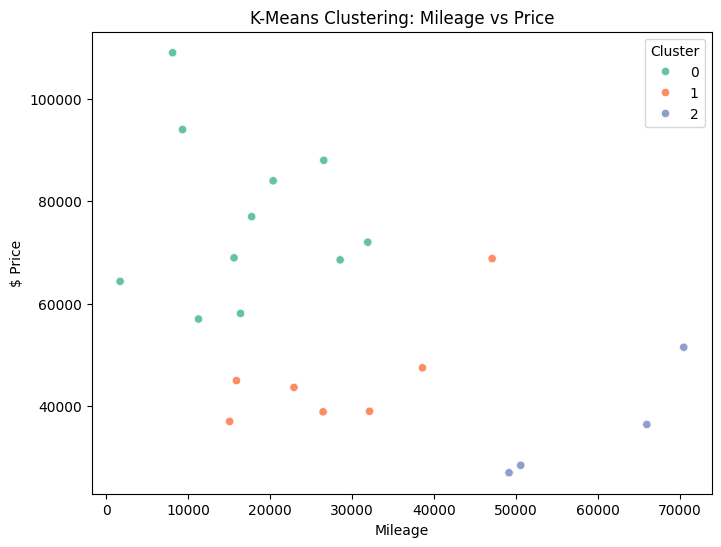

In [ ]:
# === UNSUPERVISED LEARNING ===
# KMeans Clustering on Mileage and Price
from sklearn.cluster import KMeans

unsupervised_data = df[['Mileage', '$ Price']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(unsupervised_data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Mileage', y='$ Price', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering: Mileage vs Price')
plt.show()

#Goal: Cluster cars based on mileage and price.
#Result: Displays scatterplot showing how cars are grouped.

In [ ]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop missing values
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and Target (let's assume 'price' is the target)
X = df.drop('$ Price', axis=1)
y = df['$ Price']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Results:")
print("R^2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Results:
R^2 Score: 1.0
MSE: 0.0


### **Reinforcement Learning**
- Use Q-Learning

In [ ]:
# === REINFORCEMENT LEARNING (SIMULATION) ===
# Simple Q-Learning demo (not directly applied to dataset)
import numpy as np

states = ['low_mileage', 'medium_mileage', 'high_mileage']
actions = ['buy', 'skip']
Q = np.zeros((len(states), len(actions)))

alpha = 0.1
gamma = 0.6
epsilon = 0.1

rewards = {
    ('low_mileage', 'buy'): 10,
    ('medium_mileage', 'buy'): 5,
    ('high_mileage', 'buy'): -5,
    ('low_mileage', 'skip'): 0,
    ('medium_mileage', 'skip'): 1,
    ('high_mileage', 'skip'): 2
}

for episode in range(1000):
    state = np.random.choice(states)
    if np.random.rand() < epsilon:
        action = np.random.choice(actions)
    else:
        action = actions[np.argmax(Q[states.index(state)])]

    reward = rewards.get((state, action), 0)
    next_state = np.random.choice(states)
    Q[states.index(state), actions.index(action)] = Q[states.index(state), actions.index(action)] + \
        alpha * (reward + gamma * np.max(Q[states.index(next_state)]) - Q[states.index(state), actions.index(action)])

print("\nQ-table after training:")
print(pd.DataFrame(Q, index=states, columns=actions))

#Goal: Demonstrate buying decisions based on mileage category (low, medium, high).
#Result: Trained Q-table showing best actions for each mileage state.


Q-table after training:
                      buy       skip
low_mileage     18.163544   4.465907
medium_mileage  13.769141   7.001249
high_mileage     2.128849  10.986867


## **Visualization**
- Plot
- Histogram
- Piplo
- ....etc

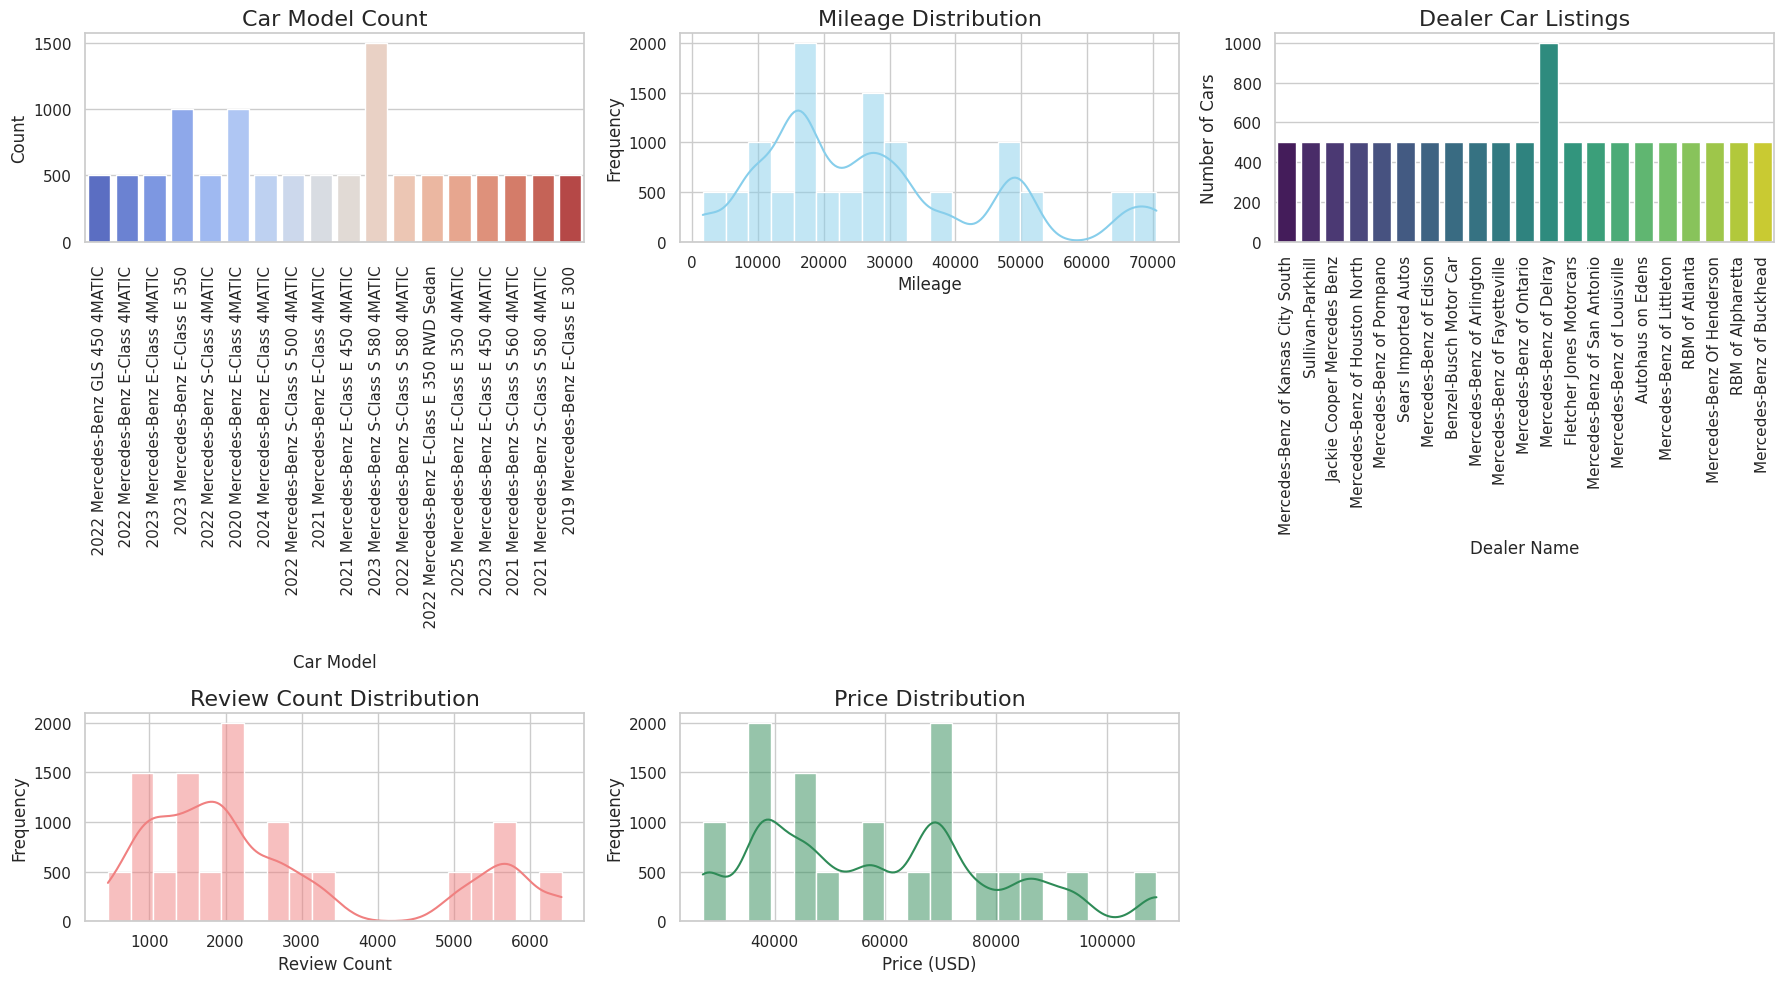

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Optional : Set a seaborn style and color palette for better aesthetics
sns.set(style="whitegrid", palette="muted")

# Assuming 'df' is your dataframe
# Set up the plotting layout (2 rows with 3 columns to avoid overlap)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Remove the extra subplot (for a cleaner grid)
axes[1, 2].axis('off')

# Plot for 'Name' (Bar chart for count of car models)
sns.countplot(data=df, x='Name', ax=axes[0, 0], palette='coolwarm', hue=None)
axes[0, 0].set_title('Car Model Count', fontsize=16)
axes[0, 0].set_xlabel('Car Model', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_xticks(axes[0, 0].get_xticks())  # Ensure ticks are set
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Plot for 'Mileage' (Histogram with KDE)
sns.histplot(df['Mileage'], kde=True, ax=axes[0, 1], color='skyblue', bins=20)
axes[0, 1].set_title('Mileage Distribution', fontsize=16)
axes[0, 1].set_xlabel('Mileage', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Plot for 'Dealer Name' (Bar chart for dealer count)
sns.countplot(data=df, x='Dealer Name', ax=axes[0, 2], palette='viridis', hue=None)
axes[0, 2].set_title('Dealer Car Listings', fontsize=16)
axes[0, 2].set_xlabel('Dealer Name', fontsize=12)
axes[0, 2].set_ylabel('Number of Cars', fontsize=12)
axes[0, 2].set_xticks(axes[0, 2].get_xticks())  # Ensure ticks are set
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=90)

# Plot for 'Review Count' (Histogram with KDE)
sns.histplot(df['Review Count'], kde=True, ax=axes[1, 0], color='lightcoral', bins=20)
axes[1, 0].set_title('Review Count Distribution', fontsize=16)
axes[1, 0].set_xlabel('Review Count', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Plot for 'Price' (Histogram with KDE)
sns.histplot(df['$ Price'], kde=True, ax=axes[1, 1], color='seagreen', bins=20)
axes[1, 1].set_title('Price Distribution', fontsize=16)
axes[1, 1].set_xlabel('Price (USD)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


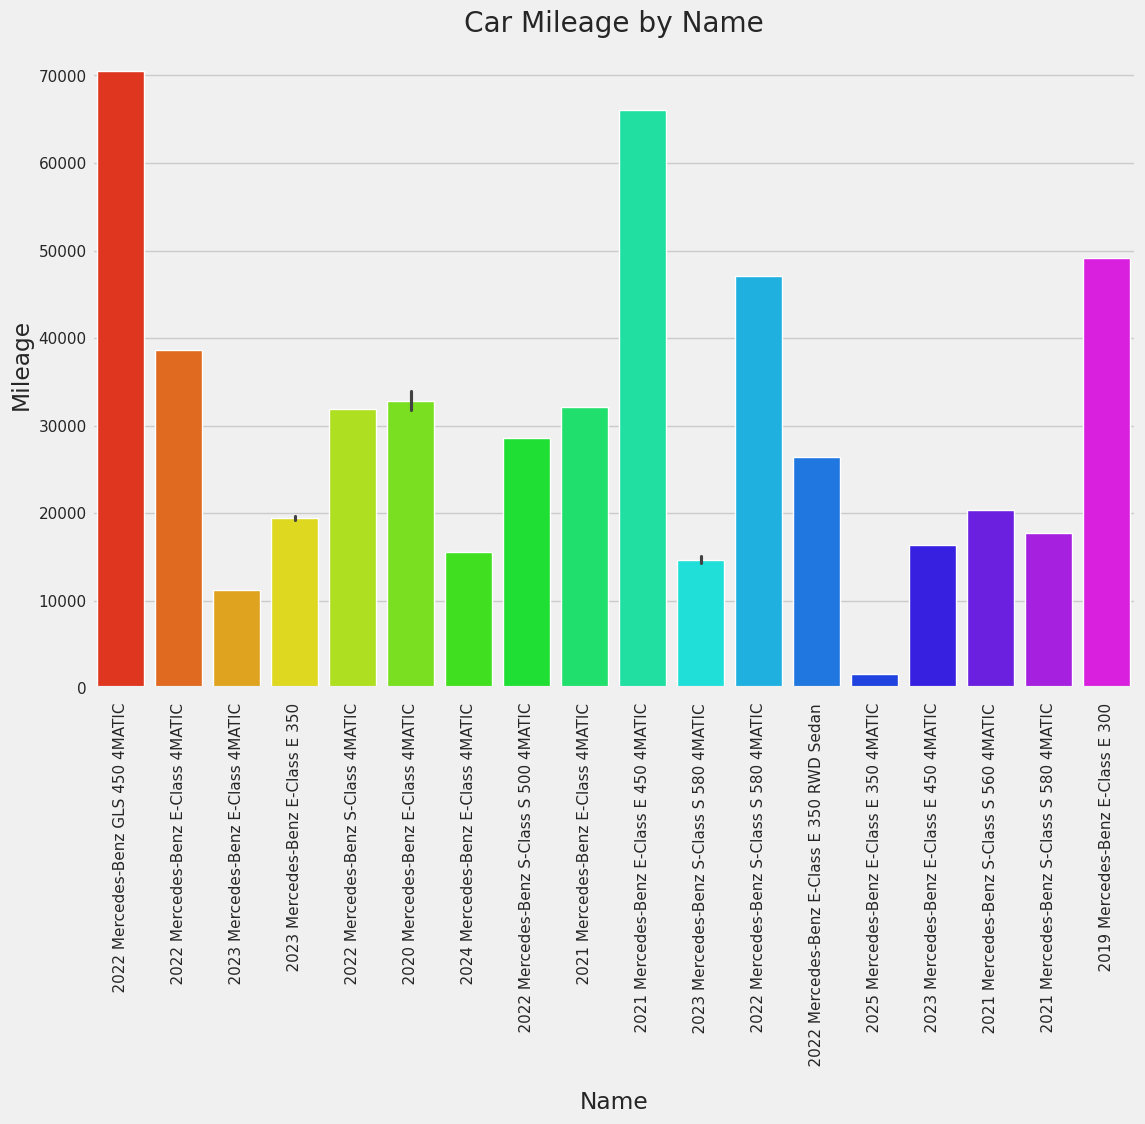

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))
plt.title("Car Mileage by Name")
sns.set(font_scale=1)
plt.xticks(rotation=90)
sns.barplot(data=df, x="Name", y="Mileage", palette="gist_rainbow")
plt.show()


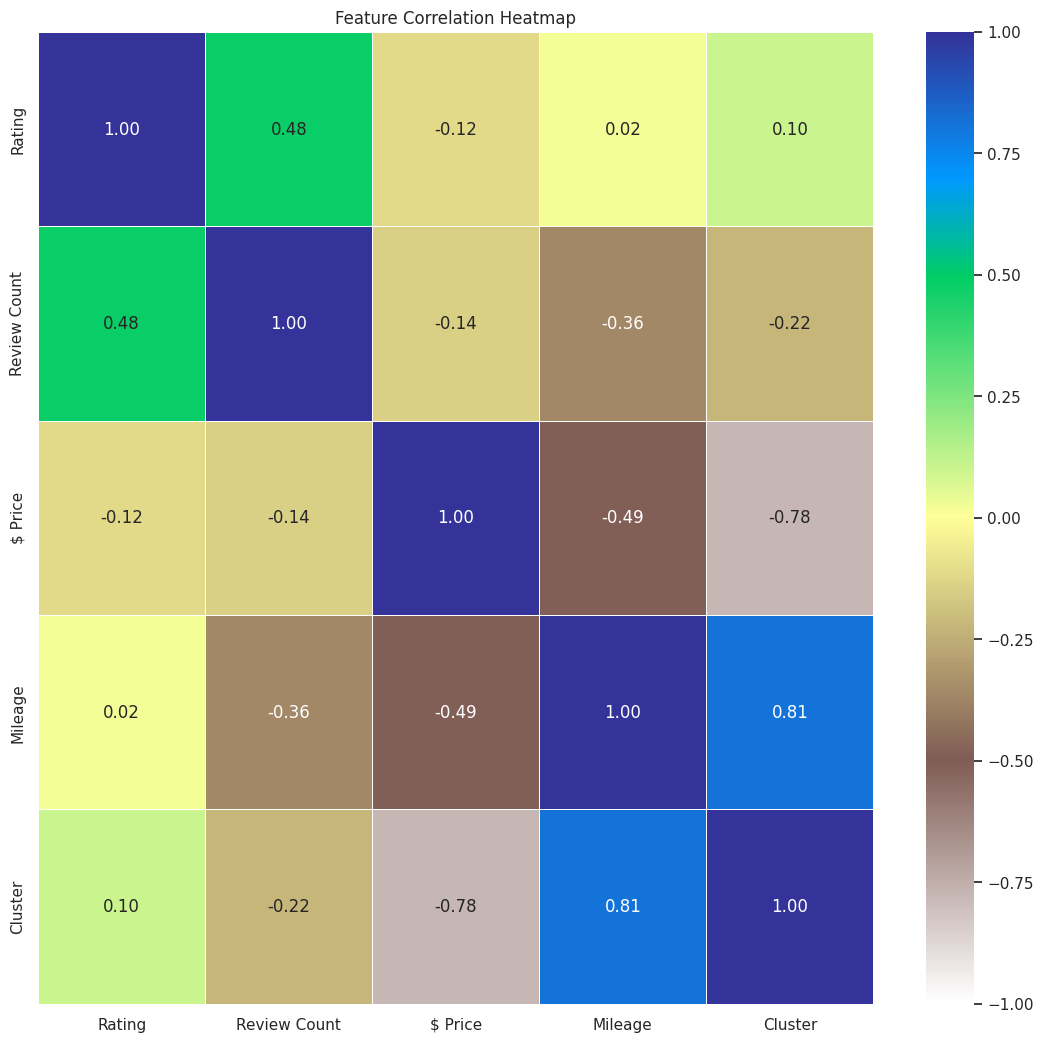

In [ ]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
fig, ax = plt.subplots(figsize=(12,12))
corr1 = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr1, ax=ax, annot=True, cmap='terrain_r', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

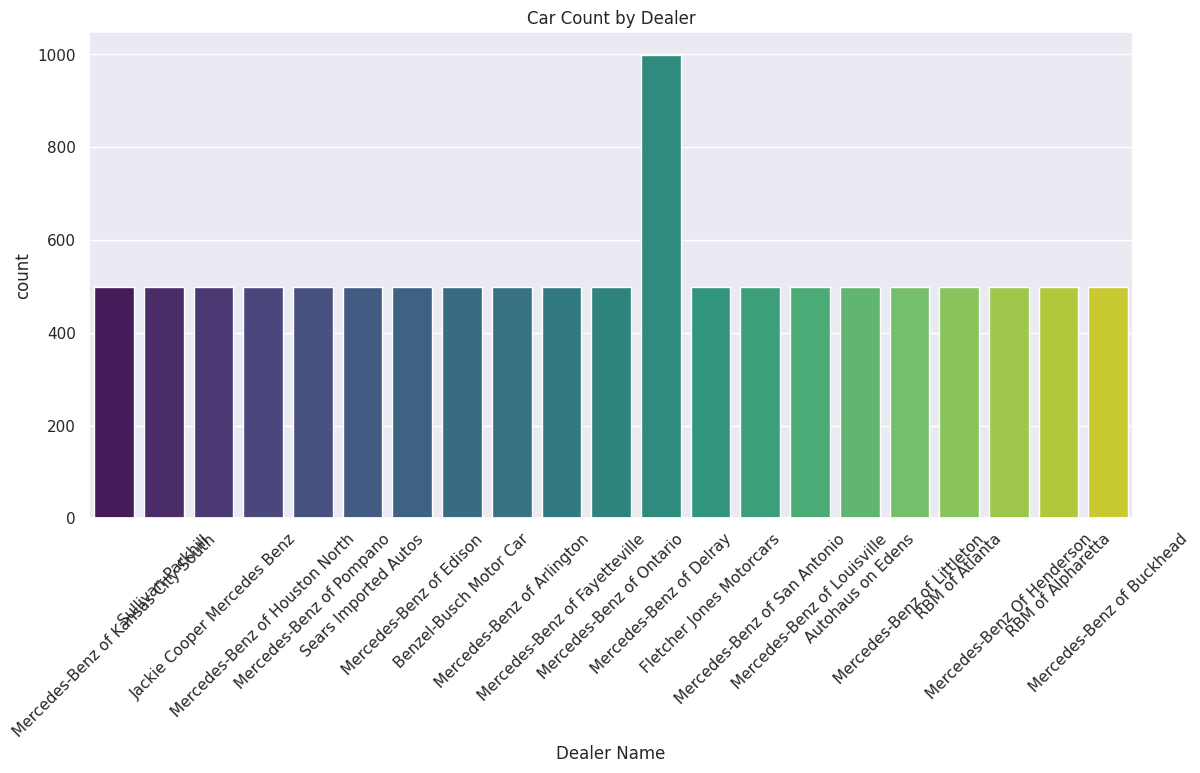

In [ ]:
# Count plot for Dealer Name
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Dealer Name", palette="viridis")
plt.title("Car Count by Dealer")
plt.xticks(rotation=45)
plt.show()

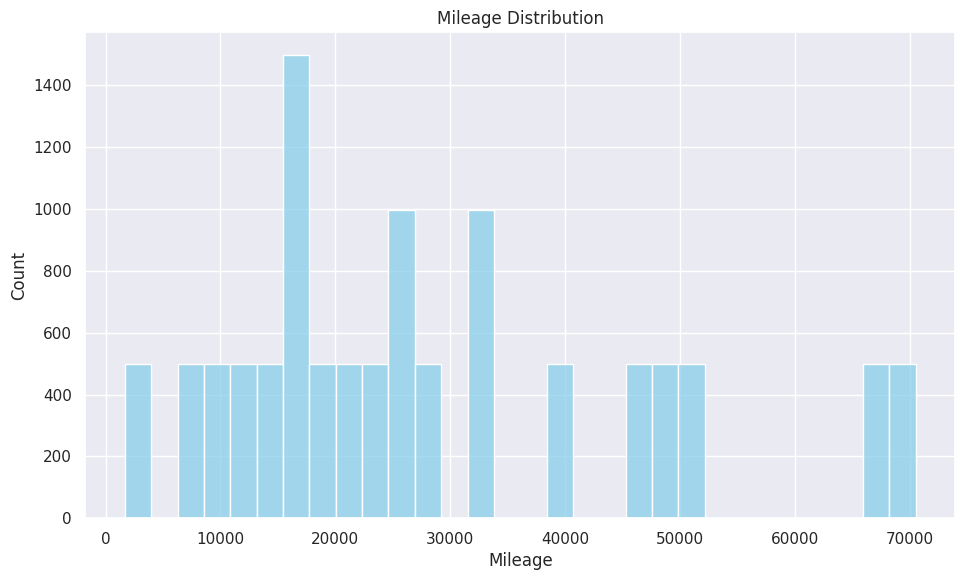

In [ ]:
# Histogram of Mileage
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Mileage", bins=30, color="skyblue")
plt.title("Mileage Distribution")
plt.show()

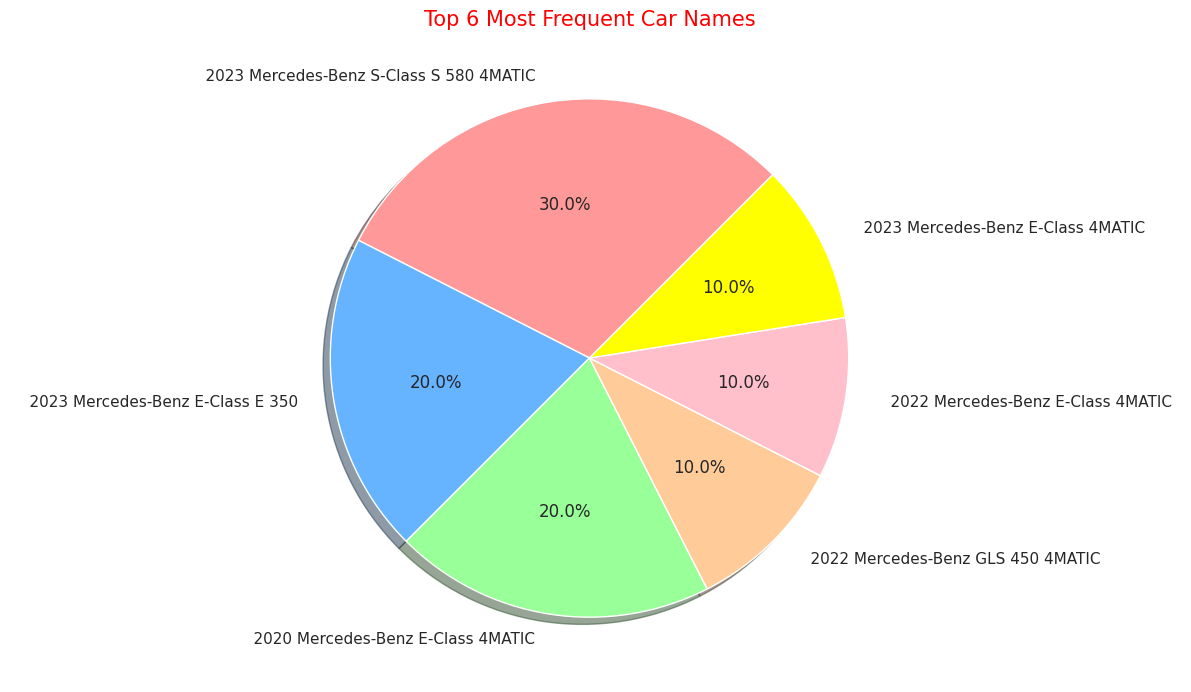

In [ ]:
# Pie chart of top car names
labels = df["Name"].value_counts().index[:6]
sizes = df["Name"].value_counts().values[:6]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','pink','yellow']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%', colors=colors, shadow=True, startangle=45)
plt.title('Top 6 Most Frequent Car Names', color = 'red', fontsize = 15)
plt.show()

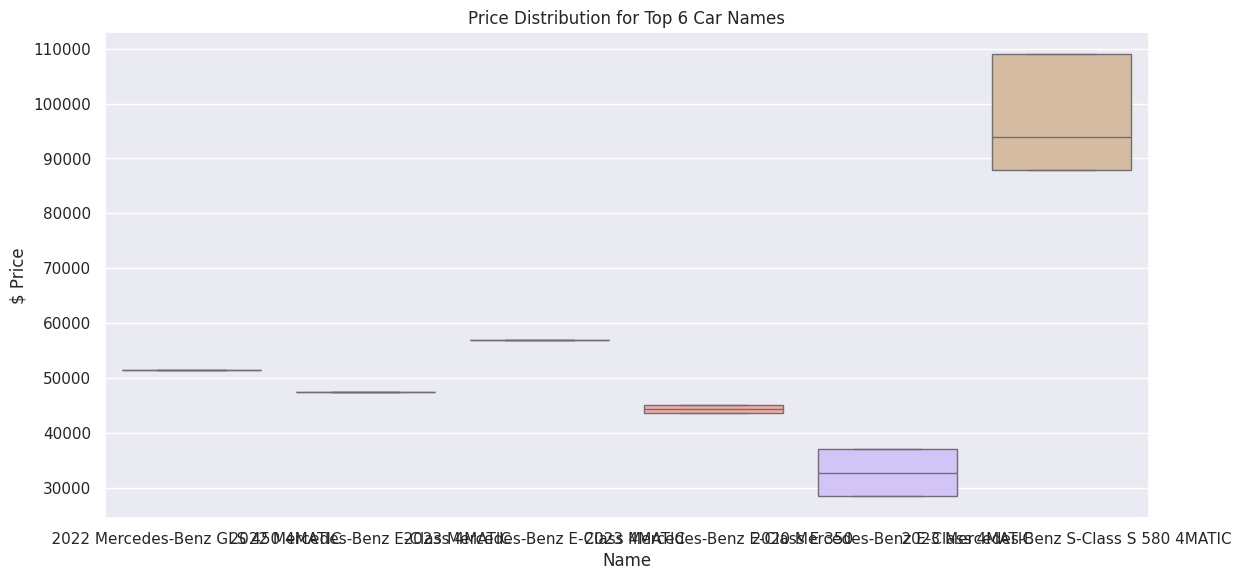

In [ ]:
# Boxplot of Price by Name (Top 6 only)
top_names = df["Name"].value_counts().index[:6]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Name'].isin(top_names)], x="Name", y="$ Price", palette="pastel")
plt.title("Price Distribution for Top 6 Car Names")
plt.show()